# Карта Мира

Набор данных содержжит информацию о нескольких важных городах:
* Координаты (в формате угловые градусы, минуты, секунды)
* Название страны
* Признак столицы (1 - столица, 0 - нет)
* Название города

Параметры данных:
* градусы северной широты - положительные
* градусы южной широты - отрицательные
* градусы восточной долготы - положительные
* градусы западной долготы - отрицательные

<b>Задание</b>

Отметить на карте города, согласно их координатам, если их население больше 1.000.000 человек (размер маркера должен быть пропорционален населению).

Столицы необходимо отметить одним маркером (например, звёздочкой), а обычные города другим (например, кружком).

Цвета всех городов одной страны должны совпадать.



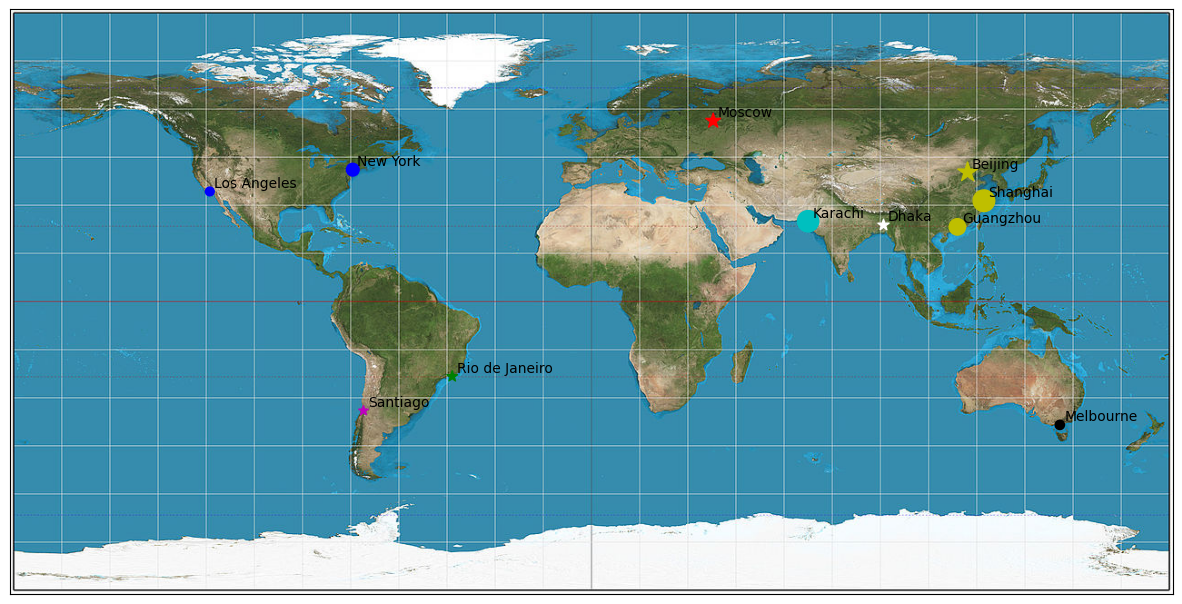

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

cities = pd.read_csv('cities.csv')
cities = cities[cities.Population > 1000000]

cities["latitude"] = cities["Longitude deg"] + cities["Longitude min"]/60 + cities["Longitude sec"]/3600
cities["longitude"] = cities["Latitude deg"] + cities["Latitude min"]/60 + cities["Latitude sec"]/3600
cities["x"] = (cities["longitude"] + 180) * 1280 / 360
cities["y"] = (-cities["latitude"] + 90) * 644 / 180
cities['color'] = cities['Country'].replace({'Russia':'r','USA':'b','Australia':'k','Chile':'m',
                                             'China':'y','Bangladesh':'w','Pakistan':'c','Brasil':'g'})
cities['s'] = round( cities['Population'] / 100000, 0)

with open('world.jpg', 'rb') as file:
    im = plt.imread(file)
    
fig, ax = plt.subplots(figsize=(15, 8))

ax.imshow(im) #, extent=[-180, 180, -90, 90]
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
cap=cities[cities['Capital'] == 1]
oth=cities[cities['Capital'] == 0]
ax.scatter(x=cap["x"], y=cap["y"], c=list(cap['color']), marker='*', s = list(cap['s'])) 
for i, txt in cap['Name'].items():
    ax.annotate(txt, (cap["x"].loc[i]+5, cap["y"].loc[i]-5))
    
ax.scatter(x=oth["x"], y=oth["y"], c=list(oth['color']), marker='o', s = list(oth['s']))
for i, txt in oth['Name'].items():
    ax.annotate(txt, (oth["x"].loc[i]+5, oth["y"].loc[i]-5))
plt.show()